In [137]:
import emcee
import corner

from scipy.stats import poisson, gamma
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize

%matplotlib inline

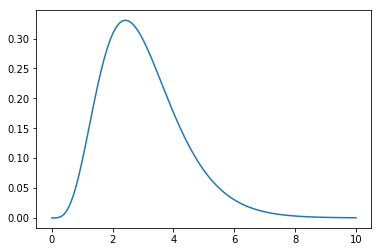

In [162]:
x = np.linspace(0, 10, 100)
a = 3**2/np.sqrt(3)
b = 3/np.sqrt(3)
theta= 1 / b

p = gamma.pdf(x, a=a, scale=theta)
plt.plot(x, p)
# plt.plot(x, np.log(p))

In [315]:
def ln_likelihood(mu, k):
    
    with np.errstate(divide='ignore', invalid='ignore'):
        likelihood_value = -mu + k*np.log(mu)
        return np.where(mu > 0, likelihood_value, -np.inf)


def ln_prior(mu):
    with np.errstate(divide='ignore', invalid='ignore'):
#         print(mu)
        E_x = 3
        V_x = 3

        b = E_x/V_x
        theta= 1 / b
        
        a = 3 * b +  1
        p = gamma.pdf(mu, a=a, scale=theta)
        p = np.log(p)
#         p = np.log(np.sqrt(1/mu))
        return np.where(mu > 0, p, np.inf)


def ln_prob(mu, k, return_posterior=False):
    
    prob = ln_likelihood(mu, k)

    if return_posterior:
        lp = ln_prior(mu)
        prob = prob + lp
    
    return prob.sum()

In [316]:
ln_prob(mu=np.array([3, 3, 3, 4, 4, 4]), k=np.array([1, 2, 3, 1, 2, 3]), return_posterior=True)
# ln_prior(mu=3)


-15.476957068548327

3.04 2.5984000000000003


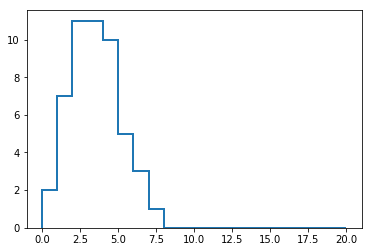

In [326]:
N = 50
true_mu = 3
rvs = poisson.rvs(mu=true_mu, size=N)
plt.hist(rvs, bins=np.arange(0, 20 + 1), histtype='step', lw=2)

print(np.mean(rvs), np.var(rvs))

No prior. Truth: 3, MLE estimate: [3.03999978]


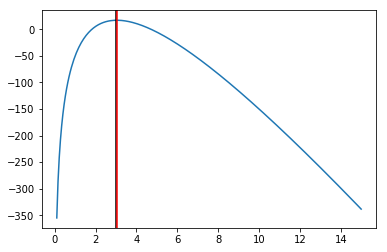

In [327]:
mus = np.linspace(0.1, 15, 250)
probs = [ln_prob(mu, k=rvs) for mu in mus]

plt.plot(mus, probs)
plt.axvline(x=true_mu, color='black')

mle_result = minimize(lambda x: -ln_prob(x, k=rvs), x0=1)

plt.axvline(x=mle_result.x, color='red')
print(f'No prior. Truth: {true_mu}, MLE estimate: {mle_result.x}')

Prior. Truth: 3, MLE estimate: [3.01999992]
mode: 3.019607843137255


/home/kbruegge/envs/gammapy/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


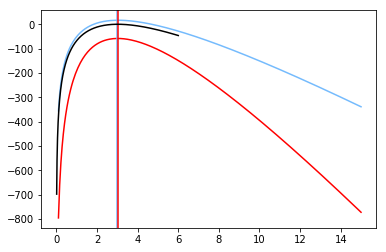

In [328]:
probs = np.array([ln_prob(mu, k=rvs, return_posterior=False) for mu in mus])
plt.plot(mus, probs, color='xkcd:sky blue')

probs = np.array([ln_prob(mu, k=rvs, return_posterior=True) for mu in mus])
plt.plot(mus, probs, color='red')

plt.axvline(x=true_mu, color='xkcd:sky blue')

map_result = minimize(lambda x: -ln_prob(x, k=rvs, return_posterior=True), x0=1)
plt.axvline(x=map_result.x, color='red')
print(f'Prior. Truth: {true_mu}, MLE estimate: {map_result.x}')


n_on = 3
a = (n_on**2/n_on) + rvs.sum()
b = n_on/n_on + len(rvs)
theta= 1 / b
x = np.linspace(0, 6, 1000)
p = gamma.pdf(x, a=a, scale=theta)
# plt.plot(x, p)
plt.plot(x, np.log(p), color='black')

print(f'mode: {(a-1)/b}')

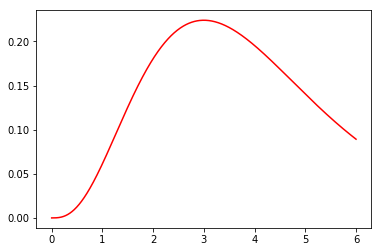

In [329]:
x = np.linspace(0, 6, 1000)


E_x = 3
V_x = 3

b = E_x/V_x
theta= 1 / b

a = 3*b + 1
p = gamma.pdf(x, a=a, scale=theta)
plt.plot(x, p, color='red')


# n_on = 3
# a = (n_on**2/n_on) + rvs.sum()
# b = n_on/n_on + len(rvs)
# theta= 1 / b

# p = gamma.pdf(x, a=a, scale=theta)
# # plt.plot(x, p)
# plt.plot(x, np.log(p), color='black')